In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

from sklearn.neural_network import BernoulliRBM

%matplotlib inline

In [2]:
# load MNIST dataset
mndata = MNIST('./data/')

train_img, train_label = mndata.load_training()
train_img = np.array(train_img)

# test_img, test_label = mndata.load_testing()
# test_img = np.array(test_img)

In [3]:
# transform input data into binary values
data = (train_img > 0).astype(float)

In [4]:
# build the Restricted Boltzmann Machine
model = BernoulliRBM(n_components=200, learning_rate=0.1, 
                     batch_size=10, n_iter=3, verbose=1)
model.fit(data)
components = model.components_

[BernoulliRBM] Iteration 1, pseudo-likelihood = -136.55, time = 11.24s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -120.84, time = 15.27s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -136.57, time = 13.61s


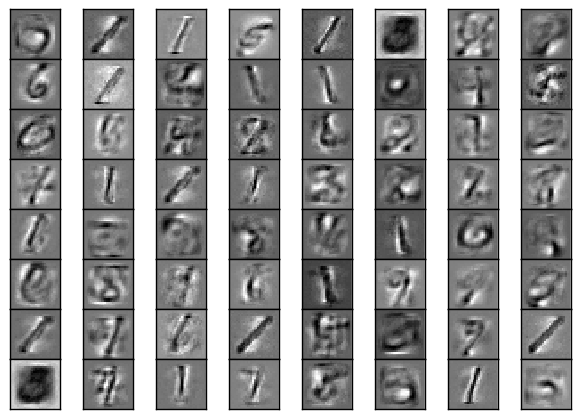

In [5]:
# visualize the learned weights
imgs = np.reshape(components[:200, :], (200, 28, 28))

fig, ax = plt.subplots(nrows=8, ncols=8)
for i in range(8):
    for j in range(8):
        ax[i, j].imshow(imgs[i * 8 + j, :, :], cmap=plt.cm.gray_r, interpolation='none')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].axis('image')
plt.tight_layout(pad=0, h_pad=0, w_pad=0, rect=None)
plt.show()